# Insert API Key

In [ ]:
import openai

openai.api_key = "ENTER API KEY HERE"

# Data Processing

### Crawler

In [71]:
import requests
import re
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
from urllib.request import Request, urlopen
import os

# Regex pattern to match a URL
HTTP_URL_PATTERN = r'^http[s]*://.+'

# Define root domain to crawl
domain = "wpengine.com"
full_url = "https://wpengine.com/"


# Create a class to parse the HTML and get the hyperlinks
class HyperlinkParser(HTMLParser):
    def __init__(self):
        super().__init__()
        # Create a list to store the hyperlinks
        self.hyperlinks = []

    # Override the HTMLParser's handle_starttag method to get the hyperlinks
    def handle_starttag(self, tag, attrs):
        attrs = dict(attrs)

        # If the tag is an anchor tag and it has an href attribute, add the href attribute to the list of hyperlinks
        if tag == "a" and "href" in attrs:
            self.hyperlinks.append(attrs["href"])

# Function to get the hyperlinks from a URL
def get_hyperlinks(url):
    
    # Try to open the URL and read the HTML
    try:
        # Open the URL and read the HTML
        req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})

        with urlopen(req) as response:

            # If the response is not HTML, return an empty list
            if not response.info().get('Content-Type').startswith("text/html"):
                return []
            
            # Decode the HTML
            html = response.read().decode('utf-8')
    except Exception as e:
        print(e)
        return []

    # Create the HTML Parser and then Parse the HTML to get hyperlinks
    parser = HyperlinkParser()
    parser.feed(html)

    return parser.hyperlinks

# Function to get the hyperlinks from a URL that are within the same domain
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    for link in set(get_hyperlinks(url)):
        clean_link = None

        # If the link is a URL, check if it is within the same domain
        if re.search(HTTP_URL_PATTERN, link):
            # Parse the URL and check if the domain is the same
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain:
                clean_link = link

        # If the link is not a URL, check if it is a relative link
        else:
            if link.startswith("/"):
                link = link[1:]
            elif link.startswith("#") or link.startswith("mailto:"):
                continue
            clean_link = "https://" + local_domain + "/" + link

        if clean_link is not None:
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    # Return the list of hyperlinks that are within the same domain
    return list(set(clean_links))


def crawl(url):
    # Parse the URL and get the domain
    local_domain = urlparse(url).netloc

    # Create a queue to store the URLs to crawl
    queue = deque([url])

    # Create a set to store the URLs that have already been seen (no duplicates)
    seen = set([url])

    # Create a directory to store the text files
    if not os.path.exists("text/"):
            os.mkdir("text/")

    if not os.path.exists("text/"+local_domain+"/"):
            os.mkdir("text/" + local_domain + "/")

    # Create a directory to store the csv files
    if not os.path.exists("processed"):
            os.mkdir("processed")

    # While the queue is not empty, continue crawling
    while queue:

        # Get the next URL from the queue
        url = queue.pop()
        print(url) # for debugging and to see the progress

        try:

            # Save text from the url to a <url>.txt file
            with open('text/'+local_domain+'/'+url[8:].replace("/", "_") + ".txt", "w") as f:

                # Get the text from the URL using BeautifulSoup
                soup = BeautifulSoup(requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}).text, "html.parser")

                # Get the text but remove the tags
                text = soup.get_text()

                # If the crawler gets to a page that requires JavaScript, it will stop the crawl
                if ("You need to enable JavaScript to run this app." in text):
                    print("Unable to parse page " + url + " due to JavaScript being required")
                
                # Otherwise, write the text to the file in the text directory
                f.write(text)

        except:
            print(f"Unable to parse text for {url}")

        # Get the hyperlinks from the URL and add them to the queue
        for link in get_domain_hyperlinks(local_domain, url):
            if link not in seen:
                queue.append(link)
                seen.add(link)

# crawl(full_url)

In [142]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('      ', ' ')
    serie = serie.str.replace('     ', ' ')
    serie = serie.str.replace('    ', ' ')
    serie = serie.str.replace('   ', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace("Plans and Pricing Resource Center ‹ Back to Resource Center", '')
    serie = serie.str.replace(r"(Skip to content .+?(?=Call Sales:1-877-973-6446))", "", case=False, regex=True)
    serie = serie.str.replace("WP Engine® Call Sales:1-877-973-6446", '')
    serie = serie.str.replace(r"(Join the 1.5M websites .*)", "", case=False, regex=True)
    serie = serie.str.replace(r"(Join the 1.2M websites .*)", "", case=False, regex=True)
    serie = serie.str.replace(r"(Skip to content .+?(?=HelpTroubleshootBrowse All))", "", case=False, regex=True)
    serie = serie.str.replace("WP Engine® Call Sales:1-877-973-6446", '')
    serie = serie.str.replace(r"(Share this article: .*)", "", case=False, regex=True)
    serie = serie.str.replace(r"Skip to content Solution.*?(?=IntelligenceeCommerce)", "", case=False, regex=True)
    serie = serie.str.replace('IntelligenceeCommerce', '')
    serie = serie.str.replace(r"CategoriesDevelopment Design.*", "", case=False, regex=True)
    serie = serie.str.replace('WP Engine Call Sales:1-877-973-6446', '')
    serie = serie.str.replace('WP Engine 504 Lavaca Street Suite 1000 Austin, TX 78701', '')
    serie = serie.str.replace(r"NEXT STEP:.*", "", case=False, regex=True)
    serie = serie.str.replace("Call Sales:1-877-973-6446Plans and Pricing Blog Blog Press Release", '')
    serie = serie.str.replace(r"About WP Engine.*", "", case=False, regex=True)
    serie = serie.str.replace(r"Posts navigation.*", "", case=False, regex=True)
    serie = serie.str.replace("Call Sales:1-877-973-6446Plans and Pricing", "")
    serie = serie.str.replace("Plans and Pricing Blog Blog Page", "")
    serie = serie.str.replace(r"Learn More Talk to a specialist Solutions Managed WordPress.*", "",case=False, regex=True)
    return serie

In [149]:
import pandas as pd

exclusions = ["wp-content_uploads", "cgi_l_email-protection", "solution-center_page", "solution-center_?fl"]

# Create a list to store the text files
texts=[]

# Get all the text files in the text directory
for file in os.listdir("text/" + domain + "/"):

    # Open the file and read the text
    with open("text/" + domain + "/" + file, "r") as f:
        text = f.read()
        
        should_exclude = False
        for exc in exclusions:
            if exc in file:
                should_exclude = True

        if not should_exclude:
            # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
            texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = df.fname + ". " + remove_newlines(df.text)
df.to_csv('processed/scraped.csv')
df.head()

/var/folders/6n/r3ppvsns3zs6xc96k7ydt2680000gn/T/ipykernel_81162/3102274242.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


,fname,text
0,m resources get url params wordpress,m resources get url params wordpress. How To ...
1,m support configure register com dns,m support configure register com dns. Point R...
2,m blog page 13,m blog page 13. WordPress Hosting News and Up...
3,m more fullerton fund chillybin case study,m more fullerton fund chillybin case study. M...
4,m blog network rail wp engine case study #respond,m blog network rail wp engine case study #resp...


<AxesSubplot: >

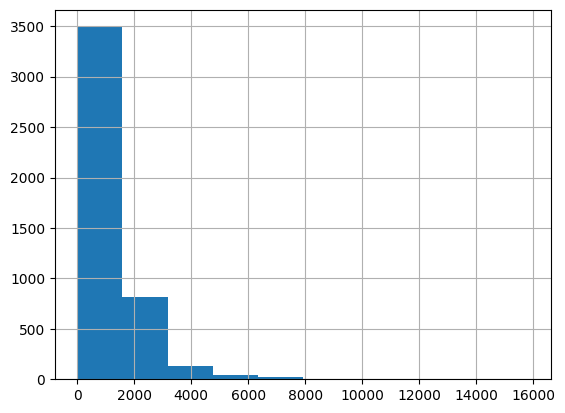

In [151]:
import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

In [152]:
max_tokens = 500

# Function to split the text into chunks of a maximum number of tokens
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]
    
    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater 
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of 
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks
    

shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])
    
    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

<AxesSubplot: >

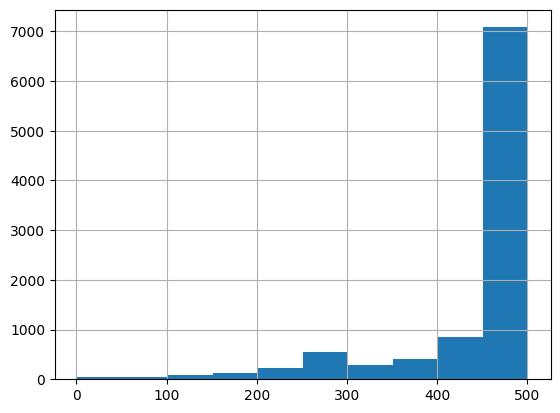

In [153]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.n_tokens.hist()

### Get Embeddings

In [155]:
df['embeddings'] = df.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])
df.to_csv('processed/embeddings.csv')
df.head()

,text,n_tokens,embeddings
0,m resources get url params wordpress. How To ...,485,"[-0.0008655134006403387, 0.01287471316754818, ..."
1,"As we mentioned earlier, URL parameters are al...",494,"[0.011862308718264103, 0.017823169007897377, 0..."
2,Let’s insert a conditional example into a Word...,475,"[-0.009767690673470497, 0.024963369593024254, ..."
3,m support configure register com dns. Point R...,499,"[0.01606571115553379, -0.012029722332954407, 0..."
4,m blog page 13. WordPress Hosting News and Up...,284,"[-0.008524220436811447, -0.029954783618450165,..."


In [156]:
from openai.embeddings_utils import distances_from_embeddings

df['embeddings'] = df.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])

df.to_csv('processed/embeddings.csv')
df.head()

,text,n_tokens,embeddings
0,m resources get url params wordpress. How To ...,485,"[-0.000918655947316438, 0.012886970303952694, ..."
1,"As we mentioned earlier, URL parameters are al...",494,"[0.011862308718264103, 0.017823169007897377, 0..."
2,Let’s insert a conditional example into a Word...,475,"[-0.009776165708899498, 0.025004424154758453, ..."
3,m support configure register com dns. Point R...,499,"[0.01606571115553379, -0.012029722332954407, 0..."
4,m blog page 13. WordPress Hosting News and Up...,284,"[-0.00868418999016285, -0.029966281726956367, ..."


In [157]:
import pandas as pd
import numpy as np
from openai.embeddings_utils import distances_from_embeddings, cosine_similarity

df=pd.read_csv('processed/embeddings.csv', index_col=0)
df['embeddings'] = df['embeddings'].apply(eval).apply(np.array)

df.head()

,text,n_tokens,embeddings
0,m resources get url params wordpress. How To ...,485,"[-0.000918655947316438, 0.012886970303952694, ..."
1,"As we mentioned earlier, URL parameters are al...",494,"[0.011862308718264103, 0.017823169007897377, 0..."
2,Let’s insert a conditional example into a Word...,475,"[-0.009776165708899498, 0.025004424154758453, ..."
3,m support configure register com dns. Point R...,499,"[0.01606571115553379, -0.012029722332954407, 0..."
4,m blog page 13. WordPress Hosting News and Up...,284,"[-0.00868418999016285, -0.029966281726956367, ..."


# Model

In [158]:
def create_context(
    question, df, max_len=1800, size="ada"
):
    """
    Create a context for a question by finding the most similar context from the dataframe
    """

    # Get the embeddings for the question
    q_embeddings = openai.Embedding.create(input=question, engine='text-embedding-ada-002')['data'][0]['embedding']

    # Get the distances from the embeddings
    df['distances'] = distances_from_embeddings(q_embeddings, df['embeddings'].values, distance_metric='cosine')


    returns = []
    cur_len = 0

    # Sort by distance and add the text to the context until the context is too long
    for i, row in df.sort_values('distances', ascending=True).iterrows():
        
        # Add the length of the text to the current length
        cur_len += row['n_tokens'] + 4
        
        # If the context is too long, break
        if cur_len > max_len:
            break
        
        # Else add it to the text that is being returned
        returns.append(row["text"])

    # Return the context
    return "\n\n###\n\n".join(returns)

def answer_question(
    df,
    model="text-davinci-003",
    question="Am I allowed to publish model outputs to Twitter, without a human review?",
    max_len=1800,
    size="ada",
    debug=False,
    max_tokens=150,
    stop_sequence=None
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    context = create_context(
        question,
        df,
        max_len=max_len,
        size=size,
    )
    # If debug, print the raw model response
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        # Create a completions using the question and context
        response = openai.Completion.create(
            prompt=f"Answer the question based on the context below, and if the question can't be answered based on the context, say \"I don't know\"\n\nContext: {context}\n\n---\n\nQuestion: {question}\nAnswer:",
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            model=model,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""

### Examples

In [159]:
answer_question(df, question="What day is it?", debug=False)

"I don't know."

In [174]:
answer_question(df, question="Which companies use wp engine?")

'Must-listen news with POLITICO Europe, FindLaw, Airtrain, Envoy Mortgage, NYC Opportunity, PEI Media, NOVA, and XWP all use WP Engine.'

In [163]:
answer_question(df, question="How will WP Engine help my business?")

"WP Engine provides optimized web hosting that delivers the best performance possible for WordPress. When you switch to a managed WordPress host like WP Engine, you won't need to worry about the day-to-day management of your website's most important contributors. We'll handle the optimization and maintenance of your server, ensuring that your site continues to run efficiently and securely. Investing in a managed WordPress host helps free up time to reinvest in growing your business."

In [164]:
answer_question(df, question="How much does WP Engine cost?")

'Prices are listed in ($) AUD ($) CAD (€) EUR (£) GBP ($) USD. Startup plans start at $30/mo ($25/mo when billed annually) and Growth plans start at $115/mo ($95/mo when billed annually).'

In [165]:
answer_question(df, question="Can WordPress extract url parameters? How?")

'Yes, WordPress can extract URL parameters. This can be done by using a plugin, such as the URL Params plugin, or by modifying page code and using the WP_Query class and the get_query_var() function.'

In [167]:
answer_question(df, question="Who is the CEO of wp engine?")

'Heather Brunner'

In [169]:
answer_question(df, question="What are the best features of wordpress?")

'The best features of WordPress include being free, mature, easy to use, secure, scalable, extendable, customizable, and well-supported.'

In [170]:
answer_question(df, question="How can I use wordpress?")

'To use WordPress, you need to buy and register a domain name, choose a WordPress host, install WordPress, add a WordPress theme to your website, create your key pages, add content to your WordPress site, add WordPress categories and tags, customize your WordPress site, install WordPress plugins, preview your WordPress site, and start using WordPress with WP Engine.'

In [175]:
answer_question(df, question="How do I set up my online store on wordpress?")

'You can set up your online store on WordPress by installing and activating the WooCommerce plugin. You can do this by going to Plugins > Add New and entering “WooCommerce” into the search bar. Select the plugin that’s authored by Automattic, and click on Install Now. Once the installation is complete, click on Activate and you will be taken to the WooCommerce Setup Wizard, where you can configure the plugin’s basic settings.'

In [177]:
answer_question(df, question="What are block templates in wordpress?")

'Block templates in WordPress are collections of blocks used to define default initial states within the Editor. These blocks can have predefined attributes and placeholder content, much like block patterns.'